In [1]:
#Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import seaborn as sns


#only projecting columns we need
proj_columns = ['Country', 'Ladder Score','Freedom', 'GDP', 'Life Expectancy', 'Generosity', 'Year']

#reading 2021 by itself because it has "regional indictor" column which other csvs are muissing
df_2021 = pd.read_csv(f"Resources/years/2021.csv")[proj_columns + ['Regional indicator']]
df_2021

,Country,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Year,Regional indicator
0,Finland,7.842,0.949,10.775,72.000,-0.098,2021,Western Europe
1,Denmark,7.620,0.946,10.933,72.700,0.030,2021,Western Europe
2,Switzerland,7.571,0.919,11.117,74.400,0.025,2021,Western Europe
3,Iceland,7.554,0.955,10.878,73.000,0.160,2021,Western Europe
4,Netherlands,7.464,0.913,10.932,72.400,0.175,2021,Western Europe
...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,0.715,7.926,48.700,-0.131,2021,Sub-Saharan Africa
145,Botswana,3.467,0.824,9.782,59.269,-0.246,2021,Sub-Saharan Africa
146,Rwanda,3.415,0.897,7.676,61.400,0.061,2021,Sub-Saharan Africa
147,Zimbabwe,3.145,0.677,7.943,56.201,-0.047,2021,Sub-Saharan Africa


In [2]:
happiness_combined_df = df_2021
#projecting only two columns 
country_df = df_2021[['Country', 'Regional indicator']]
#creating dictionary to match regional indicators to countries
country_dict = country_df.set_index('Country').to_dict()['Regional indicator'] 

In [3]:
#looping through the years except 2021 which we've already done and adding to a new comb. df 
for yr in range(2017, 2021):
    df_yr = pd.read_csv(f"Resources/years/{yr}.csv")[proj_columns]
    #adding regional indicator value to all years from country dict above
    df_yr['Regional indicator'] = df_yr['Country'].apply(lambda x: country_dict.get(x, ''))
    #combining
    happiness_combined_df = pd.concat([happiness_combined_df,
        df_yr]) 
#happiness_combined_df.to_csv('Resources/combined_happiness.csv')
happiness_combined_df = happiness_combined_df.reset_index()
happiness_combined_df.head()

,index,Country,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Year,Regional indicator
0,0,Finland,7.842,0.949,10.775,72.0,-0.098,2021,Western Europe
1,1,Denmark,7.620,0.946,10.933,72.7,0.030,2021,Western Europe
2,2,Switzerland,7.571,0.919,11.117,74.4,0.025,2021,Western Europe
3,3,Iceland,7.554,0.955,10.878,73.0,0.160,2021,Western Europe
4,4,Netherlands,7.464,0.913,10.932,72.4,0.175,2021,Western Europe


In [4]:
# #DATA CLEANING
# #identify the columns with no regional indicator
# #happiness_combined_df['Regional indicator'] == ''][['Country','Year']]
# #pd.pivot_table(happiness_combined_df, values='Country', columns='Year', aggfunc='count')
# before_clean_df = happiness_combined_df
# before_clean_df.pivot(index='Country', columns='Year', values='Country').to_csv('Resources/pivoted-for-missing-val.csv')


In [5]:
#looking at the pivoted data set, it was revealed the countries were named diffrently in
#diffrent years,to solve that, these countries were renamed to one consistent value across 
#years. Also, some countries did not have any data for some years. For instance, Belize, 
#Angola, Congo, Qatar are missing for most recent years. From our google research, it may be
#due to political situation and or high crime rate these countries.

In [6]:
#Renaming the countries
rename_cntry_dict = {
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Hong Kong S.A.R., China': 'Hong Kong',
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'North Macedonia': 'Macedonia',
    'Northern Cyprus': 'North Cyprus',
    'Taiwan Province of China': 'Taiwan',
}
rename_ri_dict = {
    'Hong Kong': 'East Asia',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Macedonia': 'Central and Eastern Europe',
    'North Cyprus': 'Western Europe',
    'Taiwan': 'East Asia',
    'Central African Republic': 'Sub-Saharan Africa',
    'South Sudan': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa'
}

# in order to loop through data frame, call iterrows function which provides us an 
#index of the row and all data in the row
for i, row in happiness_combined_df.iterrows():
    # grab either the rename value of the country, or if it is not
    # in the dictionary, just use the value already in the row as default
    #of the .get() function. We have to store this in a variable to use it 
    # for regional indicator below
    country = rename_cntry_dict.get(row['Country'], row['Country'])
    # using dataframe .at[], index from iterrows, and column name to set value
    happiness_combined_df.at[i, 'Country'] = country
    happiness_combined_df.at[i, 'Regional indicator'] = rename_ri_dict.get(country, row['Regional indicator'])

happiness_combined_df.head()

,index,Country,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Year,Regional indicator
0,0,Finland,7.842,0.949,10.775,72.0,-0.098,2021,Western Europe
1,1,Denmark,7.620,0.946,10.933,72.7,0.030,2021,Western Europe
2,2,Switzerland,7.571,0.919,11.117,74.4,0.025,2021,Western Europe
3,3,Iceland,7.554,0.955,10.878,73.0,0.160,2021,Western Europe
4,4,Netherlands,7.464,0.913,10.932,72.4,0.175,2021,Western Europe


In [7]:
# save csv after cleaning
happiness_combined_df.to_csv('Resources/combined_happiness_after_clean.csv')

In [8]:
#Data_check: identify the columns with no regional indicator
happiness_combined_df[happiness_combined_df['Regional indicator'] == '']['Country'].unique()

array(['Qatar', 'Belize', 'Somalia', 'Bhutan', 'Sudan', 'Angola', 'Syria'],
      dtype=object)

In [9]:
#identify top 5 happy and bottom 5 countries by ladder score in each year.
happiness_combined_df['rank'] = happiness_combined_df.groupby(['Year'])['Ladder Score'].rank(method='first', ascending=True)#.sort_values(['Year', 'rank'])
happiness_combined_df = happiness_combined_df.set_index(['Year', 'rank']).sort_index()
happiness_combined_df.to_csv('Resources/combined_happiness_indexed.csv')
happiness_combined_df

index                   Country  Ladder Score   Freedom  \
Year rank                                                             
2017 1.0      154  Central African Republic         2.693  0.270842   
     2.0      153                   Burundi         2.905  0.059901   
     3.0      152                  Tanzania         3.349  0.390018   
     4.0      151                     Syria         3.462  0.081539   
     5.0      150                    Rwanda         3.471  0.581844   
...           ...                       ...           ...       ...   
2021 145.0      4               Netherlands         7.464  0.913000   
     146.0      3                   Iceland         7.554  0.955000   
     147.0      2               Switzerland         7.571  0.919000   
     148.0      1                   Denmark         7.620  0.946000   
     149.0      0                   Finland         7.842  0.949000   

                  GDP  Life Expectancy  Generosity  Regional indicator  
Year rank                                                               
2017 1.0     0.000000         0.018773    0.280876  Sub-Saharan Africa  
     2.0     0.091623         0.151611    0.204435  Sub-Saharan Africa  
     3.0     0.511136         0.364509    0.354256  Sub-Saharan Africa  
     4.0     0.777153         0.500533    0.493664                      
     5.0     0.368746         0.326425    0.252756  Sub-Saharan Africa  
...               ...              ...         ...                 ...  
2021 145.0  10.932000        72.400000    0.175000      Western Europe  
     146.0  10.878000        73.000000    0.160000      Western Europe  
     147.0  11.117000        74.400000    0.025000      Western Europe  
     148.0  10.933000        72.700000    0.030000      Western Europe  
     149.0  10.775000        72.000000   -0.098000      Western Europe  

[769 rows x 8 columns]

In [10]:
happiness_combined_df.reset_index().pivot(columns='Year', index=['rank'], values=['Country','Ladder Score']).head(5)


Country                            \
Year                      2017                      2018   
rank                                                       
1.0   Central African Republic                   Burundi   
2.0                    Burundi  Central African Republic   
3.0                   Tanzania               South Sudan   
4.0                      Syria                  Tanzania   
5.0                     Rwanda                     Yemen   

                                                                       \
Year                      2019                      2020         2021   
rank                                                                    
1.0                South Sudan               Afghanistan  Afghanistan   
2.0   Central African Republic               South Sudan     Zimbabwe   
3.0                Afghanistan                  Zimbabwe       Rwanda   
4.0                   Tanzania                    Rwanda     Botswana   
5.0                     Rwanda  Central African Republic      Lesotho   

     Ladder Score                               
Year         2017   2018   2019    2020   2021  
rank                                            
1.0         2.693  2.905  2.853  2.5669  2.523  
2.0         2.905  3.083  3.083  2.8166  3.145  
3.0         3.349  3.254  3.203  3.2992  3.415  
4.0         3.462  3.303  3.231  3.3123  3.467  
5.0         3.471  3.355  3.334  3.4759  3.512

In [11]:
happiness_combined_df

index                   Country  Ladder Score   Freedom  \
Year rank                                                             
2017 1.0      154  Central African Republic         2.693  0.270842   
     2.0      153                   Burundi         2.905  0.059901   
     3.0      152                  Tanzania         3.349  0.390018   
     4.0      151                     Syria         3.462  0.081539   
     5.0      150                    Rwanda         3.471  0.581844   
...           ...                       ...           ...       ...   
2021 145.0      4               Netherlands         7.464  0.913000   
     146.0      3                   Iceland         7.554  0.955000   
     147.0      2               Switzerland         7.571  0.919000   
     148.0      1                   Denmark         7.620  0.946000   
     149.0      0                   Finland         7.842  0.949000   

                  GDP  Life Expectancy  Generosity  Regional indicator  
Year rank                                                               
2017 1.0     0.000000         0.018773    0.280876  Sub-Saharan Africa  
     2.0     0.091623         0.151611    0.204435  Sub-Saharan Africa  
     3.0     0.511136         0.364509    0.354256  Sub-Saharan Africa  
     4.0     0.777153         0.500533    0.493664                      
     5.0     0.368746         0.326425    0.252756  Sub-Saharan Africa  
...               ...              ...         ...                 ...  
2021 145.0  10.932000        72.400000    0.175000      Western Europe  
     146.0  10.878000        73.000000    0.160000      Western Europe  
     147.0  11.117000        74.400000    0.025000      Western Europe  
     148.0  10.933000        72.700000    0.030000      Western Europe  
     149.0  10.775000        72.000000   -0.098000      Western Europe  

[769 rows x 8 columns]

In [12]:
# # Collect the mean generosity scores for Finland
# average_generosity= happiness_combined_df.mean()

# # Collect the years where data was collected
# years = happiness_combined_df.keys()
# # Plot the world average as a line chart
# world_avg, = plt.plot(years, average_generosity, color="blue", label="World Average" )

# # Plot the generosity values for a single country: Finland
# country_one, = plt.plot(years, happiness_combined_df.loc['Finland',["2017","2018","2019","2020","2021"]], 
#                         color="green",label=happiness_combined_df.loc['Finland',"Country Name"])

# # Create a legend for our chart
# plt.legend(handles=[world_avg, country_one], loc="best")

# # Show the chart
# plt.show()

chart_countries_df=happiness_combined_df
chart_countries_df=chart_countries_df.set_index(['Country']).sort_index()
chart_countries_df


,index,Ladder Score,Freedom,GDP,Life Expectancy,Generosity,Regional indicator
Country,,,,,,,
Afghanistan,144,3.6320,0.085000,0.332000,0.255000,0.191000,South Asia
Afghanistan,148,2.5230,0.382000,7.695000,52.493000,-0.102000,South Asia
Afghanistan,140,3.7940,0.106180,0.401477,0.180747,0.311871,South Asia
Afghanistan,152,2.5669,0.396573,7.462861,52.590000,-0.096429,South Asia
Afghanistan,153,3.2030,0.000000,0.350000,0.361000,0.158000,South Asia
...,...,...,...,...,...,...,...
Zimbabwe,143,3.6920,0.406000,0.357000,0.248000,0.132000,Sub-Saharan Africa
Zimbabwe,137,3.8750,0.336384,0.375847,0.196764,0.189143,Sub-Saharan Africa
Zimbabwe,145,3.6630,0.361000,0.366000,0.433000,0.151000,Sub-Saharan Africa


In [13]:
happiness_factor_score = input("What Score would you like to look at?")

What Score would you like to look at? 


In [14]:
#Bubble plot: A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable. This section shows many bubble plots made with Python, using both the Matplotlib and Seaborn libraries.
#The scatterplot() function of seaborn also allows to build bubble charts. Indeed, it has a size parameter that controls circle size according to a numeric variable of the dataset.🔥
#Basic bubble chart with Python and Seaborn.Basic bubble chart with Python and Seaborn.
#Basic bubble chart with Python and Seaborn.

# data
data = happiness_combined_df.loc[happiness_combined_df.year == 2007]

# use the scatterplot function to build the bubble map
sns.scatterplot(data=data, x="gdpPercap", y="lifeExp", size="pop", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

AttributeError: 'DataFrame' object has no attribute 'year'

The correlation between both factors is 0.02
The r-squared is: 0.000545788692601001


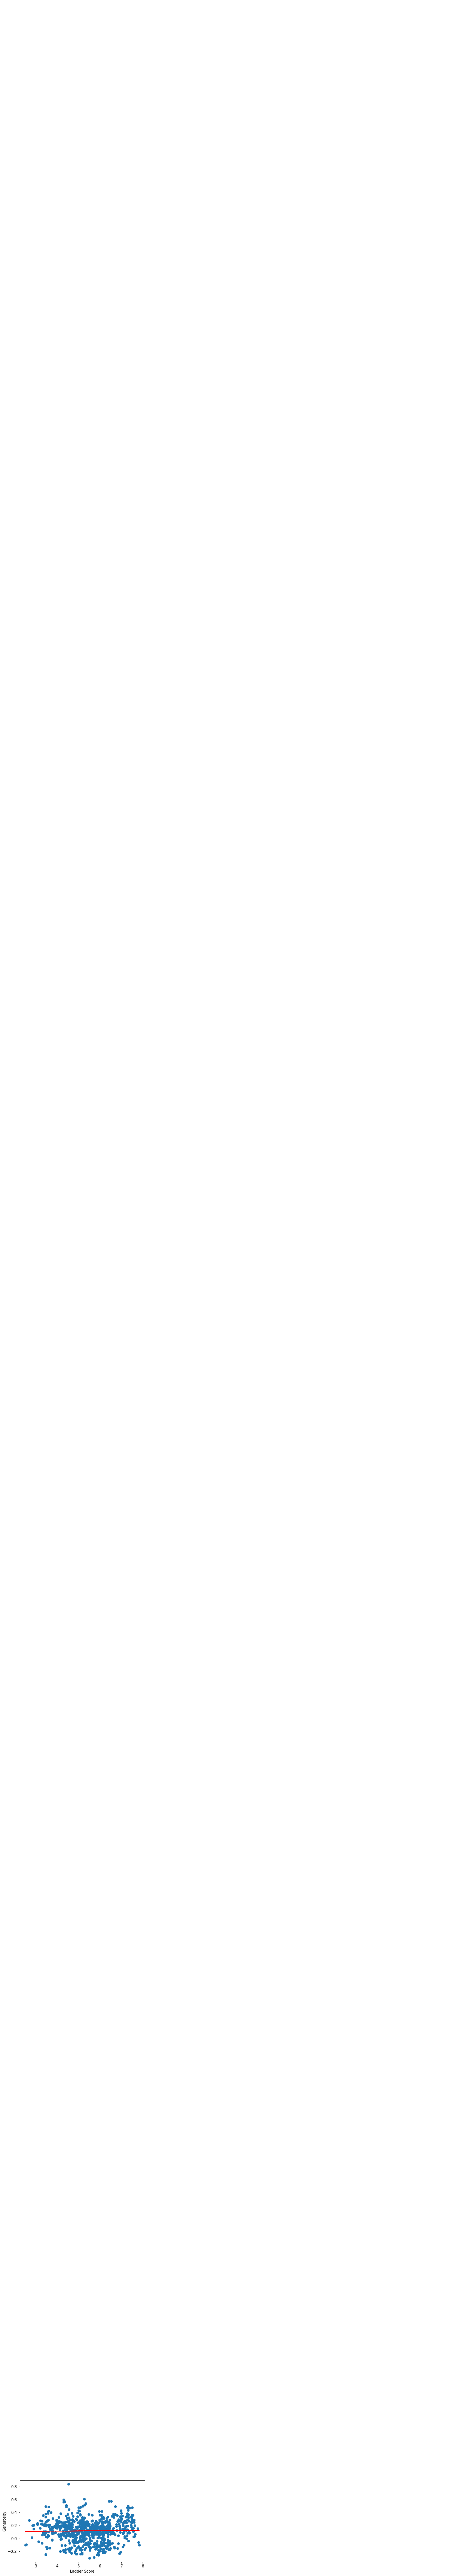

In [15]:
# Calculate the correlation coefficient and linear regression model for 
#average ladder score (happiness index) and average genorisity for the top 5 happy places and bottom 5 places

correlation = st.pearsonr(happiness_combined_df['Ladder Score'], happiness_combined_df['Generosity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values=happiness_combined_df['Ladder Score']
y_values=happiness_combined_df['Generosity']

# Add the linear regression equation and line to plot, use line regress imported from above and assign output to variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# show r-squared
print(f"The r-squared is: {rvalue**2}")

# calculate regress values to create regression line
regress_values = x_values * slope + intercept
# line equat to display on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# recreate scatter plot from above
plt.scatter(x_values, y_values)
# plot the regression line
plt.plot(x_values,regress_values,"r-")
# add line equation at value coordinates 20.5,39
plt.annotate(line_eq,(20.5,39),fontsize=15,color="red")
# add axis labels and show chart 
plt.xlabel('Ladder Score')
plt.ylabel('Generosity')
plt.show()


In [16]:
#Generosity has a fragile linear relationship with the Happiness ladder score. It looks like there is no direct relationship with happiness score.
#Generosity scores are calculated based on the countries which give the most to nonprofits around the world. Countries that are not generous 
#that does not mean they are not happy.In fact the happiest countries, had 

The correlation between both factors is 0.02
The r-squared is: 0.03433294103855202


Text(0, 0.5, 'GDP')

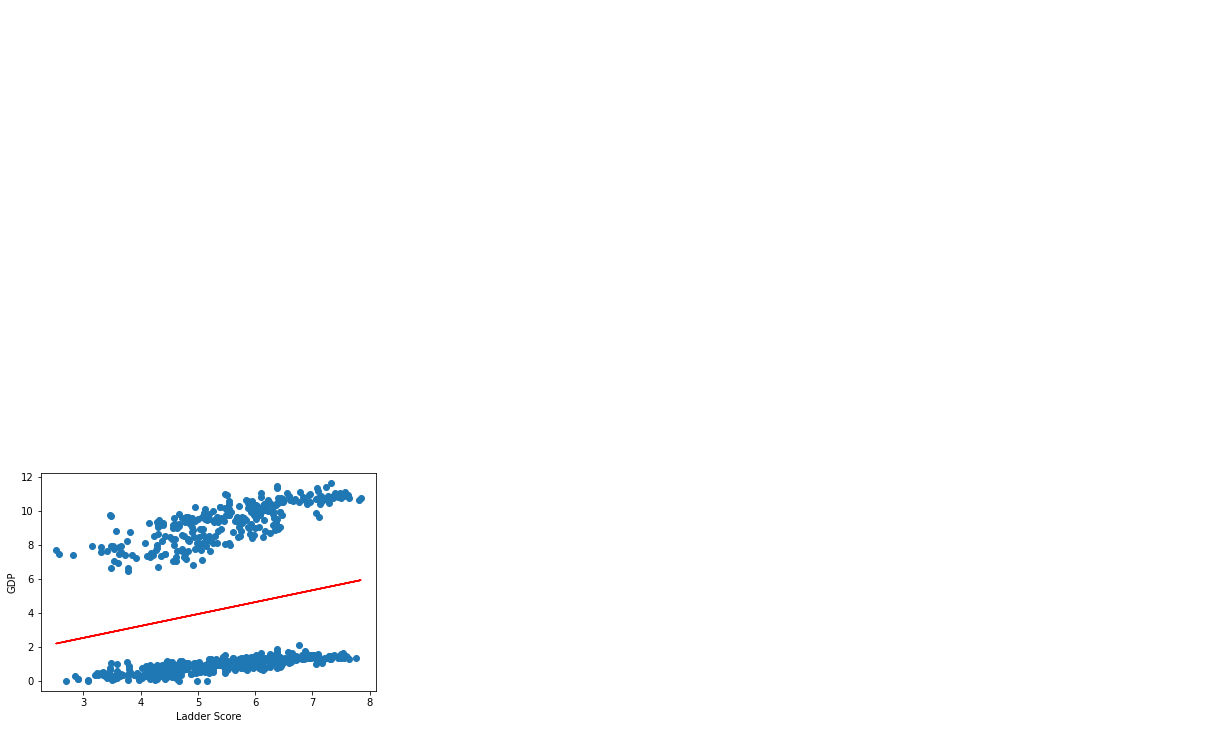

In [17]:
#GDP and Happiness Ladder score
correlation = st.pearsonr(happiness_combined_df['Ladder Score'], happiness_combined_df['Generosity'])
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values=happiness_combined_df['Ladder Score']
y_values=happiness_combined_df['GDP']

# Add the linear regression equation and line to plot, use line regress imported from above and assign output to variables
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# show r-squared
print(f"The r-squared is: {rvalue**2}")

# calculate regress values to create regression line
regress_values = x_values * slope + intercept

# line equat to display on chart
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# recreate scatter plot from above
plt.scatter(x_values, y_values)

# plot the regression line
plt.plot(x_values,regress_values,"r-")

# add line equation at value coordinates 20.5,39
plt.annotate(line_eq,(20.5,39),fontsize=15,color="red")

# add axis labels and show chart 
plt.xlabel('Ladder Score')
plt.ylabel('GDP')